In [1]:
from UTILITY_quickstart import *

In [2]:
# tao = initializeTao(
#     #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
#     # defaultsFile = "setLattice_defaults_2024-08-21_demo.yml",
#     # csrTF = True,
#     #numMacroParticles = 1e3,
#     loadDefaultLatticeTF = False
# )

In [3]:
from datetime import datetime

def get_current_time_formatted():
    return datetime.now().strftime("%Y-%m-%d-%H-%M-%S")

exportFileName = f"impactResults_{get_current_time_formatted()}.json"

## Solenoid scan

In [4]:
# history = pd.DataFrame()

# solSet = -0.41
# gridCount = 32

# for solSet in np.arange(-0.37, -0.44, -0.005):
    


# #for gridCount in [5, 10, 15, 20, 30, 40, 50, 60, 80, 100, 120, 150, 200]:


#     savedData = {}
    
#     print(f"Solenoid: {solSet}")
    
#     I = runImpact(
#         gridCount = gridCount, #E. Cropp suggests setting such that 5 = ppc = N / grids^3
#         numMacroParticles = 1e5,
#         GFILESuffix = '2024-10-22_distgen_onebunch.yaml',
#         L0APhaseOffset = 0,
#         solenoidTValue = solSet,
#         returnImpactObject = True
#     )

    
#     #P = I.particles['PR10241'].copy()
#     P = I.particles['L0AFEND'].copy()

#     # P = nudgeMacroparticleWeights(
#     #     P,
#     #     trailingBunchFraction = 0.75,
#     #     trailingBunchType = "driver"
#     # )
    
#     # PDrive, PWitness = getDriverAndWitness(P)
    
#     display(plotMod(P, 'x', 'y',  bins=100))
#     display(plotMod(P, 'x', 'xp', bins=100))
#     display(plotMod(P, 'delta_z', 'energy', bins=100))

    
#     savedData["solSet"] = solSet
#     savedData["gridCount"] = gridCount

#     #This actually seems survive export to JSON. Makes big files though
#     #savedData["P"] = P 
    
#     # savedData["norm_emit_x"] = P.norm_emit_x
#     # savedData["norm_emit_y"] = P.norm_emit_y

#     savedData["P_emitSI90_x"] = smallestIntervalImpliedEmittance(P, plane = "x", percentage = 0.90)
#     savedData["P_emitSI90_y"] = smallestIntervalImpliedEmittance(P, plane = "y", percentage = 0.90)

#     # savedData["PDrive_emitSI90_x"] = smallestIntervalImpliedEmittance(PDrive, plane = "x", percentage = 0.90)
#     # savedData["PDrive_emitSI90_y"] = smallestIntervalImpliedEmittance(PDrive, plane = "y", percentage = 0.90)

#     # savedData["PWitness_emitSI90_x"] = smallestIntervalImpliedEmittance(PWitness, plane = "x", percentage = 0.90)
#     # savedData["PWitness_emitSI90_y"] = smallestIntervalImpliedEmittance(PWitness, plane = "y", percentage = 0.90)

#     # savedData["PDrive_charge"] = PDrive.charge
#     # savedData["PWitness_charge"] = PWitness.charge

#     # savedData[f"sigmaSI90_x"] = smallestIntervalImpliedSigma(P.x, percentage = 0.90)
#     # savedData[f"sigmaSI90_y"] = smallestIntervalImpliedSigma(P.y, percentage = 0.90)

#     # print(f"""{savedData["norm_emit_x"]}, {savedData["norm_emit_y"]}""")
#     # print(f"""{savedData["emitSI90_x"]}, {savedData["emitSI90_y"]}""")

#     print(savedData)
    
#     tmpData = pd.Series( savedData ) 
#     history = pd.concat([history, tmpData.to_frame().T])

#     history.to_json(exportFileName, orient='records')

In [5]:
#history

## Final export

In [6]:
history = pd.DataFrame()

solSet = -0.41
gridCount = 64 #100


savedData = {}

print(f"Solenoid: {solSet}")

I = runImpact(
    gridCount = gridCount, #E. Cropp suggests setting such that 5 = ppc = N / grids^3
    numMacroParticles = 1e5, #5e5
    GFILESuffix = '2024-10-22_distgen_onebunch.yaml',
    L0APhaseOffset = 0,
    solenoidTValue = solSet,
    returnImpactObject = True
)


P = I.particles['PR10241'].copy()
#P = I.particles['L0AFEND'].copy()



Solenoid: -0.41
Running Impact
Assuming default file path: /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
	 Impact: Autophasing
	 Impact: Distgen
	 Impact: Tracking
Running Impact-T in /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/impact/tmp1so0yqta
/opt/homebrew/anaconda3/envs/bmad/bin/ImpactTexe
writing 100000 particles to /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/impact/tmp1so0yqta/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 100000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 7.014221353743763e-12 according to initial particles
Cathode start: Replaced Tini with -3.508444483733896e-12 according to initial particles
Setting total charge to 1.6000000000000005e-09 C
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: V2.3.1
 ! Copyright of The Regents of the University of

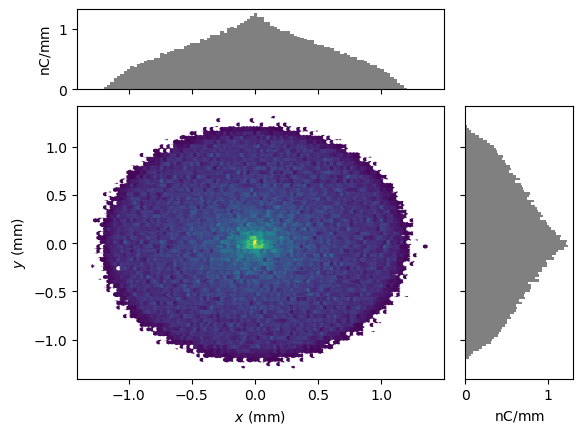

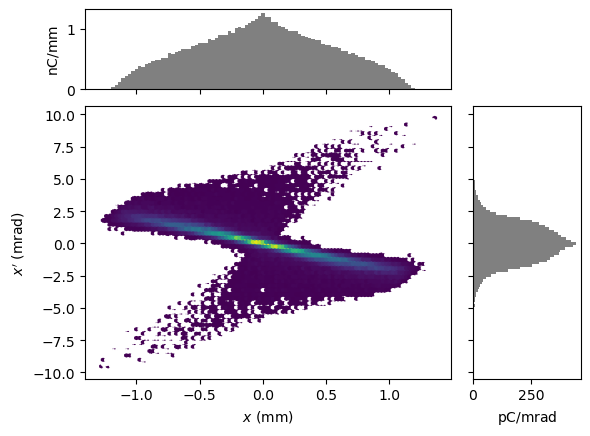

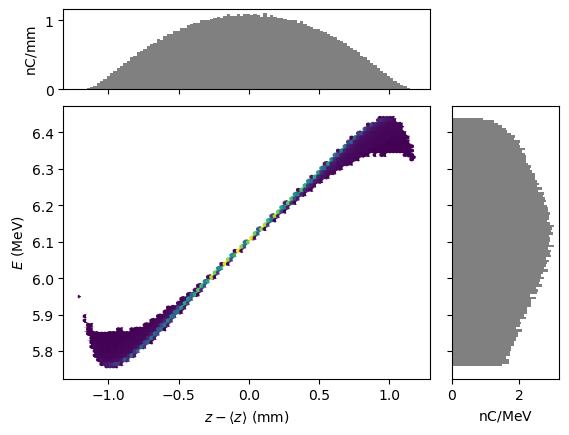

<Figure size 640x480 with 0 Axes>

In [7]:
display(plotMod(P, 'x', 'y',  bins=100))
display(plotMod(P, 'x', 'xp', bins=100))
display(plotMod(P, 'delta_z', 'energy', bins=100))
plt.clf()

In [8]:
P.drift_to_z()
P.write("2024-10-22_oneBunch_atPR10241.h5")

In [12]:
P = I.particles['PR10241'].copy()
print(f"""E: {1e-6 * P["mean_energy"]} MeV """)
print(f"""sig_z: {1e6 * smallestIntervalImpliedSigma(P.z)} um""")
print(f"""sig_E: {100 * smallestIntervalImpliedSigma(P.energy)/P["mean_energy"]} %""")
print(f"""sig_E: {1e-6 * smallestIntervalImpliedSigma(P.energy)} MeV""")

E: 6.100661601623078 MeV 
sig_z: 489.8545577537765 um
sig_E: 2.8856658403486497 %
sig_E: 0.17604470787330398 MeV
